<a href="https://colab.research.google.com/github/aqibfirdous/COB-DataScience/blob/main/Task2part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import seaborn as sns

In [52]:
train_df = pd.read_csv('/content/train data - Sheet1.csv')

In [53]:
train_df.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


<Axes: >

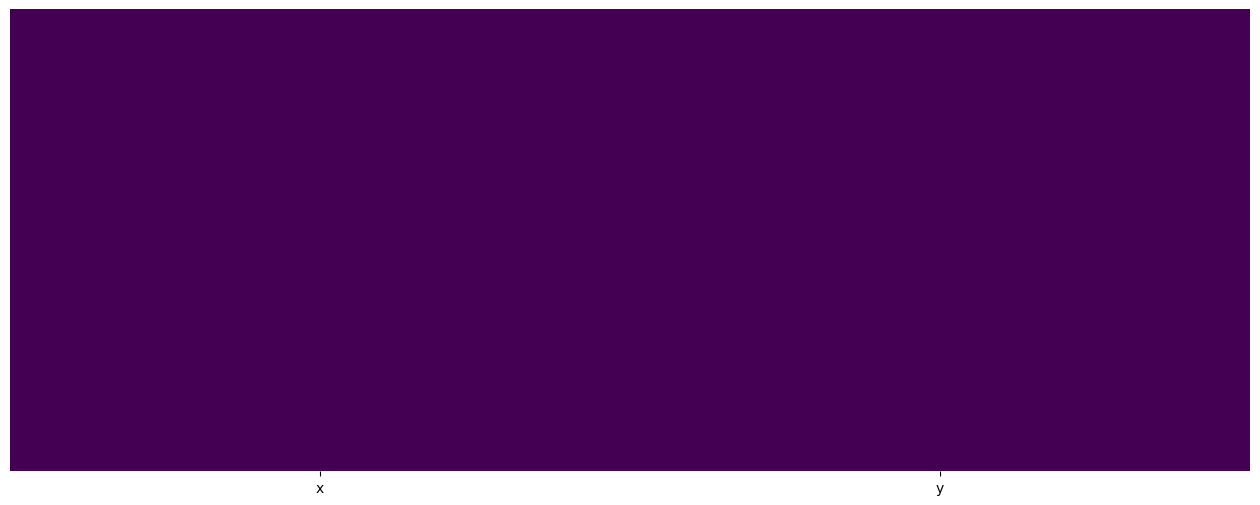

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
train_df.isnull().sum()

x    0
y    1
dtype: int64

In [56]:
columns_to_fill = ['y']
fill_value = 9999

df.fillna({col: fill_value for col in columns_to_fill}, inplace=True)


In [22]:
print(train_df.columns)

Index(['test dataset : test', 'Unnamed: 1'], dtype='object')


In [57]:
test_df = pd.read_csv('/content/test data - Sheet1.csv')

In [58]:
test_df.head(10)

,test dataset : test,Unnamed: 1
0,x,y
1,77,79.77515201
2,21,23.17727887
3,22,25.60926156
4,20,17.85738813
5,36,41.84986439
6,15,9.805234876
7,62,58.87465933
8,95,97.61793701
9,20,18.39512747


In [59]:
test_df.isnull().sum()

test dataset : test    0
Unnamed: 1             0
dtype: int64

In [60]:
print(test_df.columns)

Index(['test dataset : test', 'Unnamed: 1'], dtype='object')


Mean Squared Error: 770.3012816202481
R-squared: 0.08551543942307593


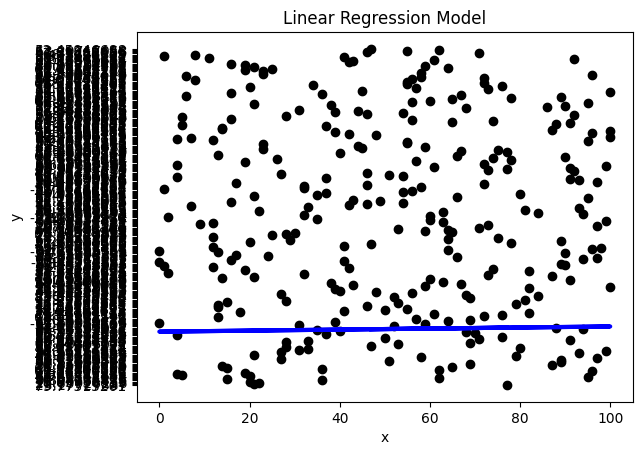

In [65]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the training dataset
train_df = pd.read_csv('/content/train data - Sheet1.csv')

# Load the testing dataset
test_df = pd.read_csv('/content/test data - Sheet1.csv')

# Rename columns in the training dataset to match the testing dataset
train_df.columns = ['x', 'y']
test_df.columns = ['x', 'y']

# Convert 'x' column to numeric, coercing errors to NaN
train_df['x'] = pd.to_numeric(train_df['x'], errors='coerce')
test_df['x'] = pd.to_numeric(test_df['x'], errors='coerce')

# Drop rows with NaN values
train_df = train_df.dropna(subset=['x'])
test_df = test_df.dropna(subset=['x'])

# Impute missing values with the mean
train_df = train_df.fillna(train_df.mean())

# Assuming 'x' and 'y' are the columns for features and target variable
x_train, y_train = train_df[['x']], train_df['y']
x_test, y_test = test_df[['x']], test_df['y']

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Mean Squared Error: 9.504119114496019
R-squared: 0.9887169210288612


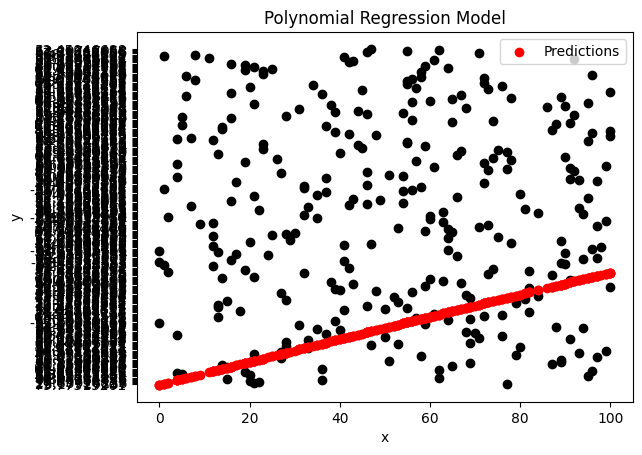

In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the training dataset
train_df = pd.read_csv('/content/train data - Sheet1.csv')

# Load the testing dataset
test_df = pd.read_csv('/content/test data - Sheet1.csv')

# Rename columns in the training dataset to match the testing dataset
train_df.columns = ['x', 'y']
test_df.columns = ['x', 'y']

# Convert 'x' column to numeric, coercing errors to NaN
train_df['x'] = pd.to_numeric(train_df['x'], errors='coerce')
test_df['x'] = pd.to_numeric(test_df['x'], errors='coerce')

# Drop rows with NaN values
train_df = train_df.dropna(subset=['x'])
test_df = test_df.dropna(subset=['x'])

# Impute missing values with the mean
train_df = train_df.fillna(train_df.mean())

# Assuming 'x' and 'y' are the columns for features and target variable
x_train, y_train = train_df[['x']], train_df['y']
x_test, y_test = test_df[['x']], test_df['y']

# Polynomial features
degree = 2  # You can experiment with different degrees
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Initialize the Polynomial Regression model
model = LinearRegression()

# Train the model on the polynomial features
model.fit(x_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.scatter(x_test, y_test, color='black')
plt.scatter(x_test, y_pred, color='red', label='Predictions')
plt.title('Polynomial Regression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



Results for Polynomial Degree 1:
Mean Squared Error: 770.3012816202481
R-squared: 0.08551543942307593


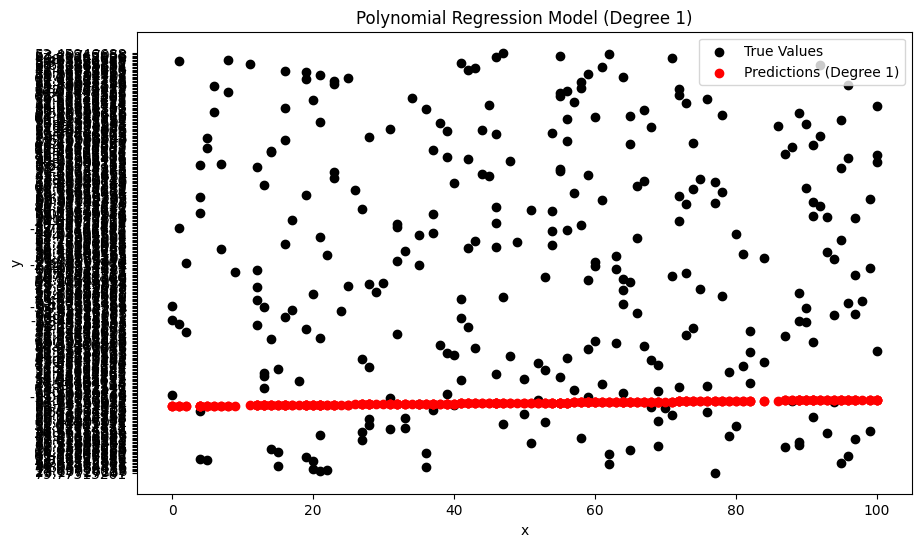


Results for Polynomial Degree 2:
Mean Squared Error: 9.504119114496019
R-squared: 0.9887169210288612


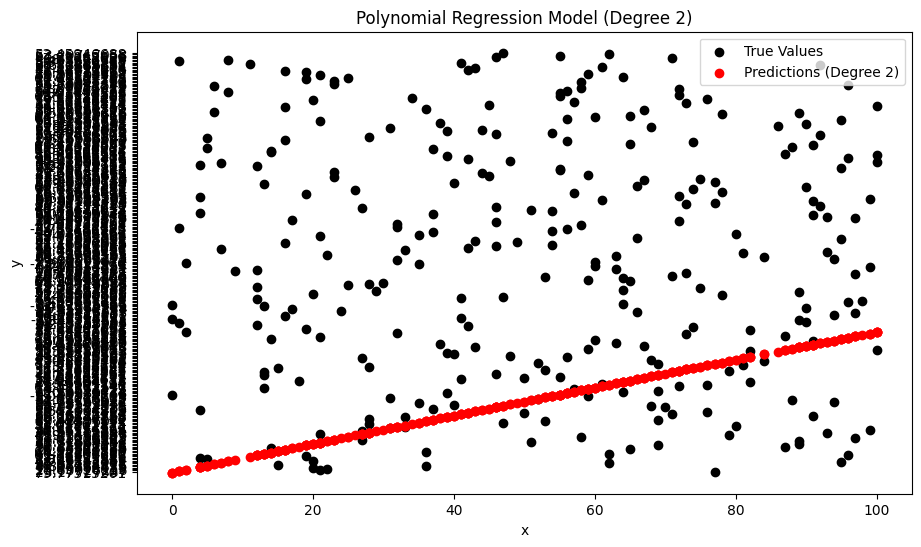


Results for Polynomial Degree 3:
Mean Squared Error: 9.463573179044724
R-squared: 0.9887650562622421


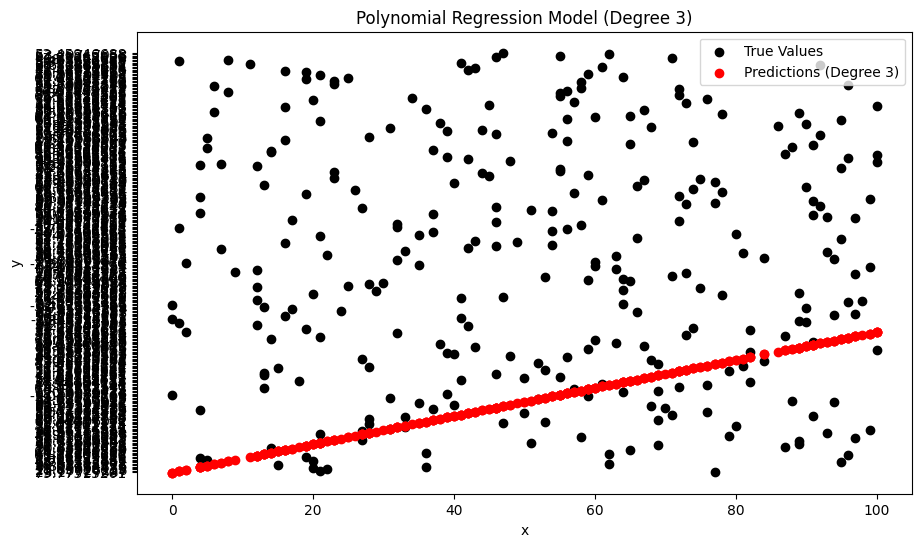


Results for Polynomial Degree 4:
Mean Squared Error: 9.49381689589853
R-squared: 0.9887291515937998


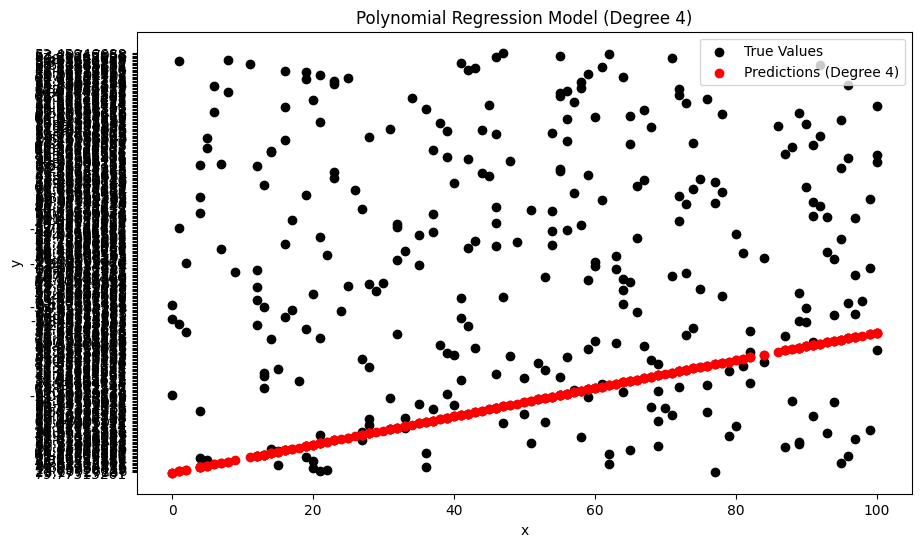


Results for Polynomial Degree 5:
Mean Squared Error: 11.553939100821799
R-squared: 0.9862834203010499


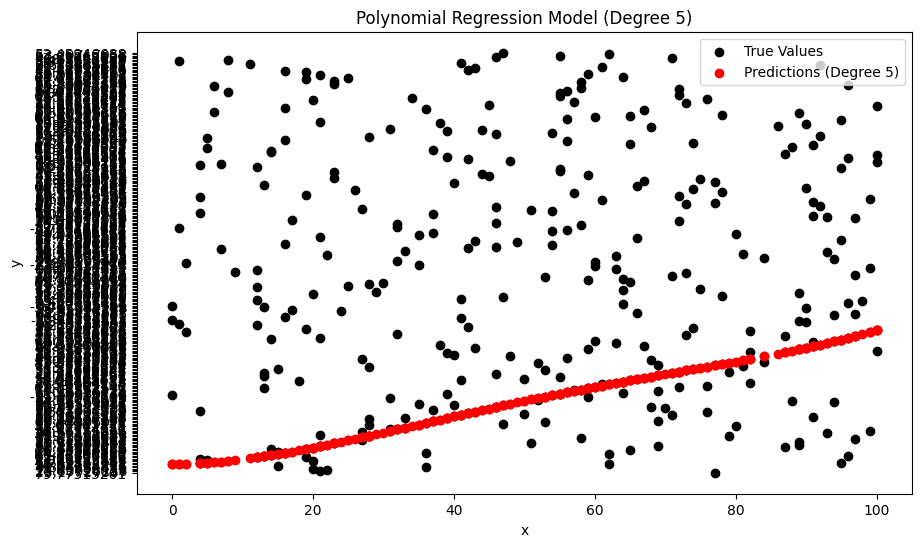

In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the training dataset
train_df = pd.read_csv('/content/train data - Sheet1.csv')

# Load the testing dataset
test_df = pd.read_csv('/content/test data - Sheet1.csv')

# Rename columns in the training dataset to match the testing dataset
train_df.columns = ['x', 'y']
test_df.columns = ['x', 'y']

# Convert 'x' column to numeric, coercing errors to NaN
train_df['x'] = pd.to_numeric(train_df['x'], errors='coerce')
test_df['x'] = pd.to_numeric(test_df['x'], errors='coerce')

# Drop rows with NaN values
train_df = train_df.dropna(subset=['x'])
test_df = test_df.dropna(subset=['x'])

# Impute missing values with the mean
train_df = train_df.fillna(train_df.mean())

# Assuming 'x' and 'y' are the columns for features and target variable
x_train, y_train = train_df[['x']], train_df['y']
x_test, y_test = test_df[['x']], test_df['y']

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Degrees to experiment with
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    # Initialize the Polynomial Regression model
    model = LinearRegression()

    # Cross-validation predictions
    y_cv_pred = cross_val_predict(model, x_train_poly, y_train, cv=kf)

    # Train the model on the full training set
    model.fit(x_train_poly, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test_poly)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\nResults for Polynomial Degree {degree}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test, y_test, color='black', label='True Values')
    plt.scatter(x_test, y_pred, color='red', label=f'Predictions (Degree {degree})')
    plt.title(f'Polynomial Regression Model (Degree {degree})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()



Results for Polynomial Degree 1:
Mean Squared Error: 770.3012821870874
R-squared: 0.08551543875013701


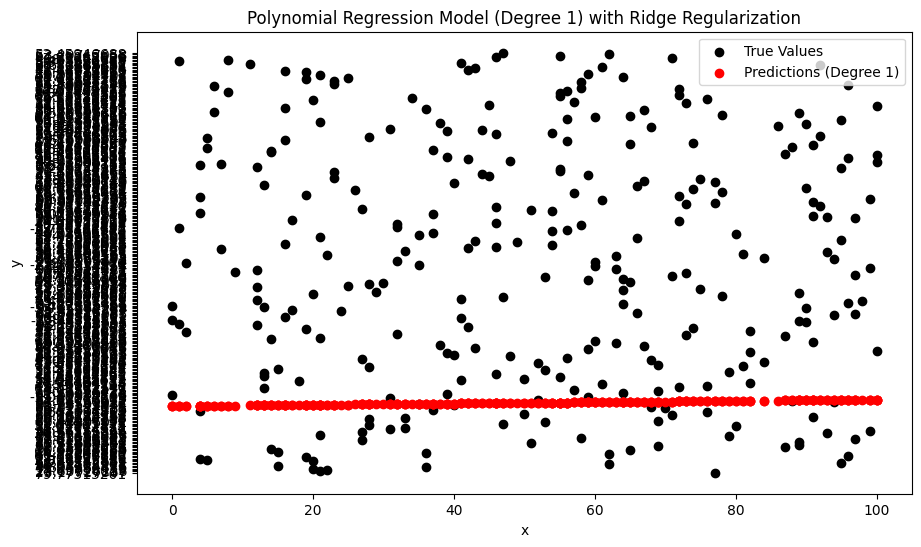


Results for Polynomial Degree 2:
Mean Squared Error: 9.504123201820743
R-squared: 0.9887169161764802


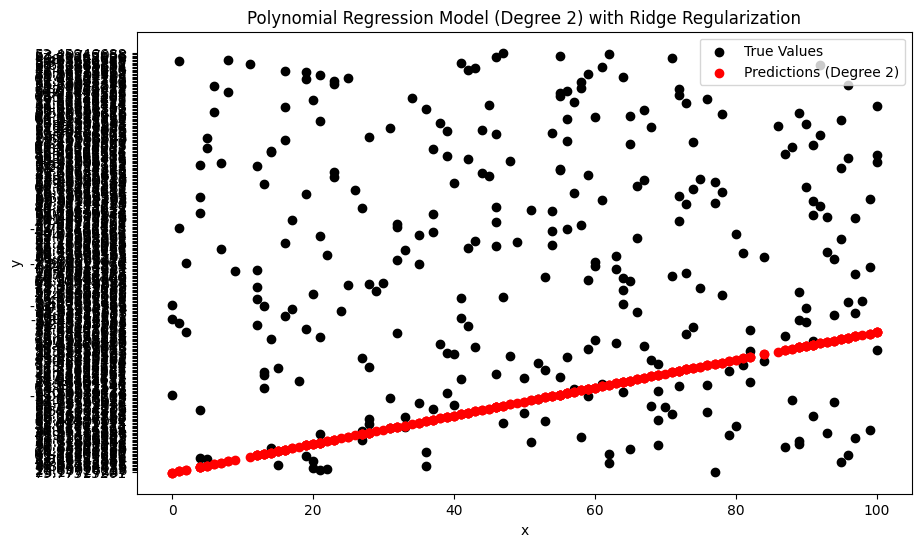

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.1748e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.1748e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.1748e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.1748e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: I


Results for Polynomial Degree 3:
Mean Squared Error: 9.46357004956191
R-squared: 0.9887650599774945


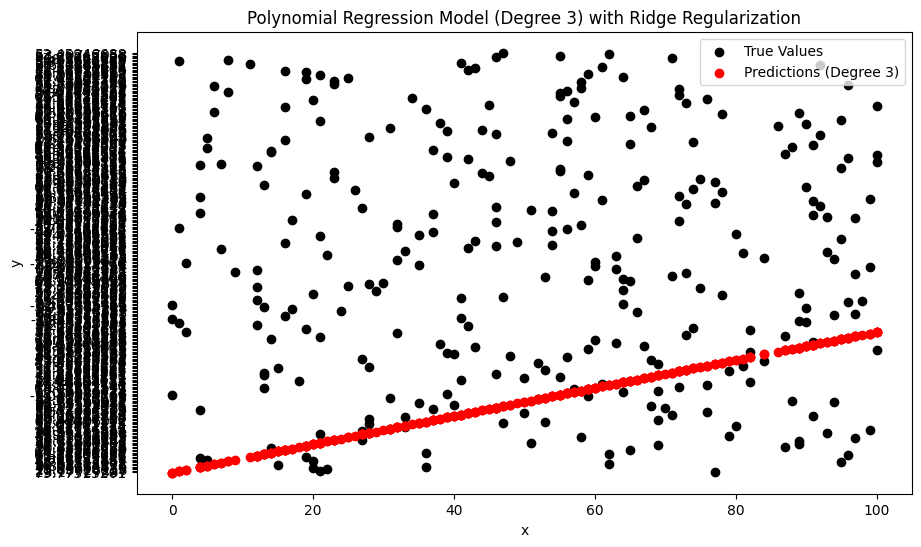

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.15242e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.20063e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.15242e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.15242e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin


Results for Polynomial Degree 4:
Mean Squared Error: 9.49373369317515
R-squared: 0.9887292503702237


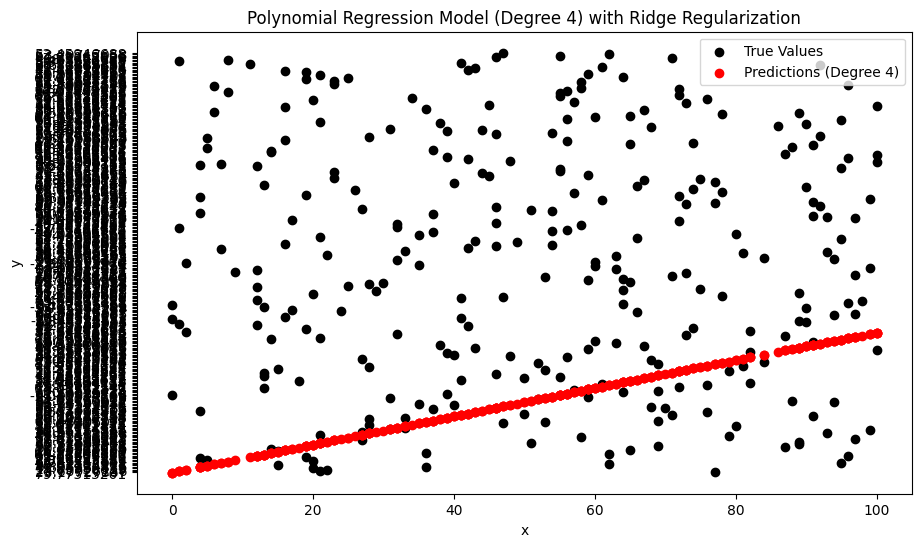

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.33206e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.40815e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.33206e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.33206e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin


Results for Polynomial Degree 5:
Mean Squared Error: 9.497319357522905
R-squared: 0.9887249935492062


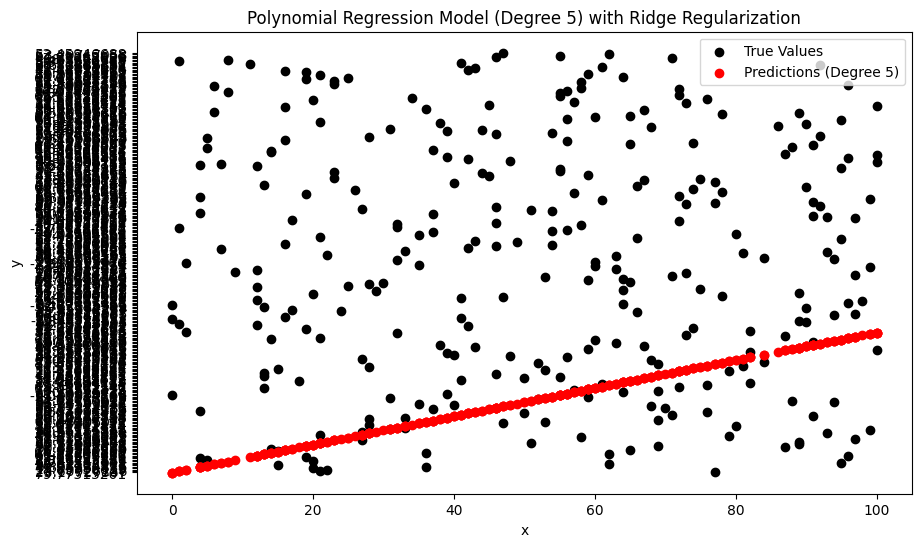

In [68]:
from sklearn.linear_model import Ridge

for degree in degrees:
    # Polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    # Initialize the Ridge Regression model with regularization parameter alpha
    model = Ridge(alpha=0.1)

    # Cross-validation predictions
    y_cv_pred = cross_val_predict(model, x_train_poly, y_train, cv=kf)

    # Train the model on the full training set
    model.fit(x_train_poly, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test_poly)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'\nResults for Polynomial Degree {degree}:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test, y_test, color='black', label='True Values')
    plt.scatter(x_test, y_pred, color='red', label=f'Predictions (Degree {degree})')
    plt.title(f'Polynomial Regression Model (Degree {degree}) with Ridge Regularization')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.17295e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


For x=1.5, predicted y=1.119516695257531
For x=2.5, predicted y=2.1367595793128267
For x=3.5, predicted y=3.153669685425584


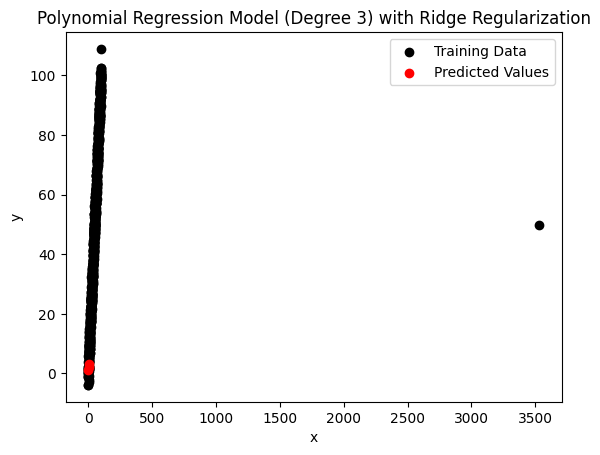

In [69]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge  # Using Ridge regression for regularization
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Load the training dataset
train_df = pd.read_csv('/content/train data - Sheet1.csv')

# Rename columns in the training dataset
train_df.columns = ['x', 'y']

# Convert 'x' column to numeric, coercing errors to NaN
train_df['x'] = pd.to_numeric(train_df['x'], errors='coerce')

# Drop rows with NaN values
train_df = train_df.dropna(subset=['x'])

# Impute missing values with the mean
train_df = train_df.fillna(train_df.mean())

# Assuming 'x' and 'y' are the columns for features and target variable
x_train, y_train = train_df[['x']], train_df['y']

# Polynomial features
degree = 3  # Choose the degree based on your previous analysis
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train)

# Initialize the Ridge Regression model with regularization parameter alpha
model = Ridge(alpha=0.1)

# Train the model on the full training set
model.fit(x_train_poly, y_train)

# Now, let's say you have new values of 'x' for which you want to predict 'y'
new_x_values = np.array([[1.5], [2.5], [3.5]])  # Example new values

# Transform new 'x' values using polynomial features
new_x_values_poly = poly.transform(new_x_values)

# Make predictions on the new 'x' values
new_y_pred = model.predict(new_x_values_poly)

# Display the predictions
for x_val, y_pred in zip(new_x_values.flatten(), new_y_pred):
    print(f'For x={x_val}, predicted y={y_pred}')

# If you want to visualize the predictions along with the training data:
plt.scatter(x_train, y_train, color='black', label='Training Data')
plt.scatter(new_x_values, new_y_pred, color='red', label='Predicted Values')
plt.title(f'Polynomial Regression Model (Degree {degree}) with Ridge Regularization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
